**Phase 1 Project**

**Author:** Jonathan Holt
***

# Overview

## The Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I have been charged with exploring what types of films are currently doing the best at the box office, as well as translating those findings into actionable insights.


## The Data

I have been provided with data from several movie tracking websites. The data includes:
- general movie information (title, staff, release date)
- financial data (production budget, gross revenue)
- user and critic ratings

The data is very broad and each data set contains certain data points but none contain all of the data points. My task will be to clean and organize this data into a usable format for gaining insights into the movie industry so that I can make recommendations to Micorosoft.

For this project, I will using the following data:
- Financial Data from The Numbers
- Genre information from IMDB
- Ratings from IMDB


## Questions that I want to answer:

1. How do we determine what a successful movie is?
2. Which genres have been the most successful recently?
3. Which of these genres should Microsoft pursue?
4. How much should Microsoft budget for the movies they produce?

# Data Preparation


## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') #style that I am using for my visualizations
import seaborn as sns

%matplotlib inline

In [2]:
import glob, os
fpath = 'zippedData/'
os.listdir(fpath)
#source: https://www.youtube.com/watch?v=BKpSVE0VF0U&list=PLQp1KyYFwVkYidKxcOrKHvRuVtUOc4W2h&index=11

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [3]:
#source: https://www.youtube.com/watch?v=BKpSVE0VF0U&list=PLQp1KyYFwVkYidKxcOrKHvRuVtUOc4W2h&index=11
query = fpath+"*.gz"

file_list=glob.glob(query)
file_list


['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [4]:
 #source: https://www.youtube.com/watch?v=BKpSVE0VF0U&list=PLQp1KyYFwVkYidKxcOrKHvRuVtUOc4W2h&index=11
tables = {}

for file in file_list:
    print('---'*20)
    file_name = file.replace('zippedData/', '').replace('.', '_')
    print(file_name)
    
    
    
    if 'tsv.gz' in file:
        temp_df = pd.read_csv(file, sep= "\t", encoding = "latin-1")
    else:
        temp_df = pd.read_csv(file)
    
    display(temp_df.head(), temp_df.tail())
    tables[file_name] = temp_df
   

------------------------------------------------------------
imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


------------------------------------------------------------
tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


------------------------------------------------------------
imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


------------------------------------------------------------
imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


------------------------------------------------------------
imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


------------------------------------------------------------
rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


------------------------------------------------------------
imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


------------------------------------------------------------
rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


------------------------------------------------------------
tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


------------------------------------------------------------
bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


------------------------------------------------------------
imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


## Formating Cell
I am keeping all of my display commands here so I can easily find them if/when I need
to change anything.

In [5]:
pd.set_option('display.max_rows', 1000)
#change the amount of rows displayed

pd.options.display.float_format = '{:,.2f}'.format 

#function for displaying money in millions.
def display_millions(x, pos):
    return '${:1.1f}M'.format(x*1e-6)

## Table Aliases
Setting an alias for each table so that it is easier to use them.

In [6]:
table1 = tables['imdb_title_crew_csv_gz']
table2 = tables['tmdb_movies_csv_gz']
table3 = tables['imdb_title_akas_csv_gz']
table4 = tables['imdb_title_ratings_csv_gz']
table5 = tables['imdb_name_basics_csv_gz']
table6 = tables['rt_reviews_tsv_gz']
table7 = tables['imdb_title_basics_csv_gz']
table8 = tables['rt_movie_info_tsv_gz']
table9 = tables['tn_movie_budgets_csv_gz']
table10 = tables['bom_movie_gross_csv_gz']
table11 = tables['imdb_title_principals_csv_gz']

# Initial Data Cleaning

I will start my data exploration/cleaning with the financial information from The Numbers (table9)

In [7]:
#sorting by worldwide gross
table9.sort_values(by='worldwide_gross', ascending=False).head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3737,38,"Aug 21, 2009",Fifty Dead Men Walking,"$10,000,000",$0,"$997,921"
3432,33,"Sep 30, 2005",Duma,"$12,000,000","$870,067","$994,790"


Something is wrong here. I assume that it is sorting anything with a '9' in the front first. I presume that the dollar amounts are strings instead of integers. I should also check for null values while I'm checking for this.

In [8]:
table9.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no null values, but there are likely placeholders

I will now clean the three financial columns. Removing the $, removing the comma, then converting to float.

In [9]:
cleaned_budget = table9['production_budget'].map(lambda x: x.replace('$',' '))
cleaned_budget = cleaned_budget.map(lambda x: x.replace(',',''))
cleaned_budget = cleaned_budget.astype(float)

cleaned_domestic = table9['domestic_gross'].map(lambda x: x.replace('$',' '))
cleaned_domestic =cleaned_domestic.map(lambda x: x.replace(',',''))
cleaned_domestic = cleaned_domestic.astype(float)

cleaned_worldwide = table9['worldwide_gross'].map(lambda x: x.replace('$',' '))
cleaned_worldwide = cleaned_worldwide.map(lambda x: x.replace(',',''))
cleaned_worldwide = cleaned_worldwide.astype(float)

In [10]:
#Putting my cleaned data into the table.
table9["production_budget"] = cleaned_budget
table9["domestic_gross"] = cleaned_domestic
table9["worldwide_gross"] = cleaned_worldwide
table9 = table9.sort_values(by='worldwide_gross', ascending=False)

#converting release_date to datetime format.
cleaned_release_date = pd.to_datetime(table9['release_date'])
table9['release_date']= cleaned_release_date

#Creating a column 'release_year' to more easily search general release dates, etc.
table9['release_year'] = table9['release_date'].dt.year

table9.head(2)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009
42,43,1997-12-19,Titanic,"200,000,000.00","659,363,944.00","2,208,208,395.00",1997


What is the range of release dates in this data set?

In [11]:
table9.sort_values(by='release_date', ascending=False).tail(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5523,24,1916-09-05,Intolerance,"385,907.00",0.00,0.00,1916
5677,78,1915-02-08,The Birth of a Nation,"110,000.00","10,000,000.00","11,000,000.00",1915


In [12]:
table9.sort_values(by='release_date', ascending=False).head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,95,2020-12-31,Moonfall,"150,000,000.00",0.00,0.00,2020
1205,6,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00,2020


The earliest movie is from 1915. The most recent are from 2020.
- I doubt that I will need data from movies from more than a few decades ago. I will slice out recent movie data as I proceed with my data cleaning.
- The movies from 2020 have no performance data. It will be okay to exclude them from analysis as they aren't relevant.
- The bulk of the data starts in 1996 where there are 100+ movies every year afterward until 2018. There is a little bit of info for 2019.

## Calculating Total Profit and ROI
- The first way that I will be manipulating the cleaned data is to calculate two financial performance metrics: Total Profit, and Return on Investment (ROI)

In [13]:
#creating a column that calculates the profit for each movie. (gross - budget)
total_profit = table9.apply(lambda x: x['worldwide_gross'] - x['production_budget'], axis=1)
table9['total_profit'] = total_profit

#creating a column that calculates ROI for each movie. (Profit divided by budget)
roi = table9.apply(lambda x: x['total_profit'] / x['production_budget'], axis=1)
table9['ROI'] = roi

table9.head(2)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI
0,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,"2,351,345,279.00",5.53
42,43,1997-12-19,Titanic,"200,000,000.00","659,363,944.00","2,208,208,395.00",1997,"2,008,208,395.00",10.04


## Getting Genre Data
I am happy with where my financial data is at the moment. Now I want to find a way to indentify the **genres** of these movies as that will help me answer the specific question of what ***types*** **of movies should be made.**. 
I will use IMDB Basics (Table 7) to get this data. I need to clean the data and find a way to properly combine it with the financial data that I already have.

In [14]:
table7.sort_values(by='start_year', ascending=True).head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
9599,tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,nan,Comedy
43264,tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61.00,Music


### Analysis:
- This data only goes back to 2010. **This will still be useful as Microsoft will want current information on
which genres are popular.**
- I want to see what other data I can collect from the IMDB datasets before attempting to merge the titles from this dataset with my financial data.

In [15]:
#simplified to an inner join.
imdb_df = pd.merge(table7, table4, on= 'tconst', how='inner')
imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517


In [16]:
#dropping any duplicates
imdb_df = imdb_df.drop_duplicates('original_title', keep='first')
imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517


## Merging the Dataframes

I want to now merge this imdb_df with my financial information from The Numbers (table9). I know that if I just do a merge on primary title, some of the results will be incorrect. (Avatar is the top grossing movie but is listed as a horror movie)


In [17]:
# join with the indiciator column so I can track where everything is coming from.
merged_originals = pd.merge(table9, imdb_df, left_on= 'movie', right_on= 'original_title', how='left', indicator=True)
merged_originals.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge
0,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,"2,351,345,279.00",5.53,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
1,43,1997-12-19,Titanic,"200,000,000.00","659,363,944.00","2,208,208,395.00",1997,"2,008,208,395.00",10.04,tt2495766,Titanic,Titanic,"2,012.00",nan,Adventure,6.20,20.00,both
2,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000.00","936,662,225.00","2,053,311,220.00",2015,"1,747,311,220.00",5.71,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
3,7,2018-04-27,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",2018,"1,748,134,200.00",5.83,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018.00",149.00,"Action,Adventure,Sci-Fi",8.50,"670,926.00",both
4,34,2015-06-12,Jurassic World,"215,000,000.00","652,270,625.00","1,648,854,864.00",2015,"1,433,854,864.00",6.67,tt0369610,Jurassic World,Jurassic World,"2,015.00",124.00,"Action,Adventure,Sci-Fi",7.00,"539,338.00",both


In [18]:
merged_originals.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,start_year,runtime_minutes,averagerating,numvotes
count,"5,782.00","5,782.00","5,782.00","5,782.00","5,782.00","5,782.00","5,782.00","2,123.00","2,071.00","2,123.00","2,123.00"
mean,50.37,"31,587,757.10","41,873,326.87","91,487,460.91","2,003.97","59,899,703.81",3.80,"2,013.61",104.05,6.24,"84,935.39"
std,28.82,"41,812,076.83","68,240,597.36","174,719,968.78",12.72,"146,088,881.08",29.53,2.53,18.82,1.15,"147,611.63"
min,1.00,"1,100.00",0.00,0.00,"1,915.00","-200,237,650.00",-1.00,"2,010.00",5.00,1.60,5.00
25%,25.00,"5,000,000.00","1,429,534.50","4,125,414.75","2,000.00","-2,189,070.75",-0.51,"2,011.00",91.50,5.60,"1,186.00"
50%,50.00,"17,000,000.00","17,225,945.00","27,984,448.50","2,007.00","8,550,285.50",0.71,"2,014.00",102.00,6.40,"28,893.00"
75%,75.00,"40,000,000.00","52,348,661.50","97,645,836.50","2,012.00","60,968,501.75",2.76,"2,016.00",115.00,7.00,"100,493.50"
max,100.00,"425,000,000.00","936,662,225.00","2,776,345,279.00","2,020.00","2,351,345,279.00","1,799.00","2,019.00",189.00,9.20,"1,841,066.00"


- 5782 records after the join.
- I am going to slice these records into two datasets. One that merged on original title, and everything else that still needs to merge.

In [19]:
correct_merge_df = merged_originals.loc[(merged_originals["_merge"] == "both")]
need_to_merge = merged_originals.loc[(merged_originals["_merge"] != "both")]

### Dealing with Avatar

In [20]:
correct_merge_df = correct_merge_df.drop(['_merge'], axis=1) #dropping '_merge' so I can continue

Locating Avatar and moving it to the correct_merge_df as I can tell from the release_year, and original_title that the horror movie Avatar is not the one that was the best grossing movie of all time.

In [21]:
avatar = merged_originals.loc[(merged_originals['movie'] == 'Avatar')]
correct_merge_df = correct_merge_df.append(avatar, ignore_index = True)

In [22]:
correct_merge_df.sort_values('total_profit', ascending=False).head(3) 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge
2123,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,"2,351,345,279.00",5.53,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
0,43,1997-12-19,Titanic,"200,000,000.00","659,363,944.00","2,208,208,395.00",1997,"2,008,208,395.00",10.04,tt2495766,Titanic,Titanic,"2,012.00",nan,Adventure,6.20,20.00,NaN
1,7,2018-04-27,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",2018,"1,748,134,200.00",5.83,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018.00",149.00,"Action,Adventure,Sci-Fi",8.50,"670,926.00",NaN


In [23]:
#need to drop the indicator column if I want to use it again.
need_to_merge = need_to_merge.drop(['_merge'], axis=1)

In [24]:
#dropping Avatar as I know that it is not merging correctly.
need_to_merge = need_to_merge.drop(0)
need_to_merge.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000.00","936,662,225.00","2,053,311,220.00",2015,"1,747,311,220.00",5.71,NaN,NaN,NaN,nan,nan,NaN,nan,nan


### Merging into Project Dataframe
- This is the dataframe that I plan on using as the basis for my analysis.

In [25]:
#merging need_to_merge  with primary name.
merged_with_primary = pd.merge(need_to_merge, imdb_df, left_on= 'movie', right_on= 'primary_title',
                               how='left', indicator=True)

merged_with_primary.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_x,...,numvotes_x,tconst_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000.00","936,662,225.00","2,053,311,220.00",2015,"1,747,311,220.00",5.71,NaN,...,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000.00","353,007,020.00","1,518,722,794.00",2015,"1,328,722,794.00",6.99,NaN,...,nan,tt2820852,Furious 7,Furious Seven,"2,015.00",137.00,"Action,Crime,Thriller",7.20,"335,074.00",both


In [26]:
merged_with_primary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3673 entries, 0 to 3672
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 3673 non-null   int64         
 1   release_date       3673 non-null   datetime64[ns]
 2   movie              3673 non-null   object        
 3   production_budget  3673 non-null   float64       
 4   domestic_gross     3673 non-null   float64       
 5   worldwide_gross    3673 non-null   float64       
 6   release_year       3673 non-null   int64         
 7   total_profit       3673 non-null   float64       
 8   ROI                3673 non-null   float64       
 9   tconst_x           0 non-null      object        
 10  primary_title_x    0 non-null      object        
 11  original_title_x   0 non-null      object        
 12  start_year_x       0 non-null      float64       
 13  runtime_minutes_x  0 non-null      float64       
 14  genres_x

In [27]:
merged_with_primary = merged_with_primary.drop(merged_with_primary[['tconst_x', 'primary_title_x', 'original_title_x',
                                                                    'start_year_x','runtime_minutes_x', 'genres_x',
                                                                    'averagerating_x', 'numvotes_x', '_merge',
                                                                   'tconst_y']], axis=1)
                                                                        
merged_with_primary.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000.00","936,662,225.00","2,053,311,220.00",2015,"1,747,311,220.00",5.71,NaN,NaN,nan,nan,NaN,nan,nan
1,67,2015-04-03,Furious 7,"190,000,000.00","353,007,020.00","1,518,722,794.00",2015,"1,328,722,794.00",6.99,Furious 7,Furious Seven,"2,015.00",137.00,"Action,Crime,Thriller",7.20,"335,074.00"


In [28]:
#Renaming the columns which contain _y
merged_with_primary.rename(columns = {'averagerating_y':'averagerating', 'numvotes_y':'numvotes',
                              'primary_title_y':'primary_title', 'original_title_y':'original_title',
                              'start_year_y': 'start_year', 'runtime_minutes_y': 'runtime_minutes',
                              'genres_y' : 'genres'}, inplace = True)

In [29]:
merged_with_primary.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000.00","936,662,225.00","2,053,311,220.00",2015,"1,747,311,220.00",5.71,NaN,NaN,nan,nan,NaN,nan,nan
1,67,2015-04-03,Furious 7,"190,000,000.00","353,007,020.00","1,518,722,794.00",2015,"1,328,722,794.00",6.99,Furious 7,Furious Seven,"2,015.00",137.00,"Action,Crime,Thriller",7.20,"335,074.00"


Appending "merged with primary" to correct merge to make project_df.

In [30]:
project_df =  correct_merge_df.append(merged_with_primary, ignore_index=True)
project_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge
0,43,1997-12-19,Titanic,"200,000,000.00","659,363,944.00","2,208,208,395.00",1997,"2,008,208,395.00",10.04,tt2495766,Titanic,Titanic,"2,012.00",nan,Adventure,6.20,20.00,NaN
1,7,2018-04-27,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",2018,"1,748,134,200.00",5.83,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018.00",149.00,"Action,Adventure,Sci-Fi",8.50,"670,926.00",NaN


In [31]:
#checking for duplicates
duplicates = project_df[project_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge


In [32]:
#storing this df as project_df_master to keep all of this data safe before I start slicing out what I need.
project_df_master = project_df

### Cleaning the genre data

The genres that I got from the IMDB dataset are still a set of strings contained in a single field. I need to split them out into three seperate cells so that I can properly analyze them.

### Getting Genre Data 

In [33]:
#source- Office Hours 10/12 6:30PM
data=project_df.copy()
data['genres_list'] = data['genres'].str.split(pat=",")
genre_data = data.explode('genres_list')
genre_data.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge,genres_list
0,43,1997-12-19,Titanic,"200,000,000.00","659,363,944.00","2,208,208,395.00",1997,"2,008,208,395.00",10.04,tt2495766,Titanic,Titanic,"2,012.00",nan,Adventure,6.20,20.00,NaN,Adventure
1,7,2018-04-27,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",2018,"1,748,134,200.00",5.83,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018.00",149.00,"Action,Adventure,Sci-Fi",8.50,"670,926.00",NaN,Action
1,7,2018-04-27,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",2018,"1,748,134,200.00",5.83,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018.00",149.00,"Action,Adventure,Sci-Fi",8.50,"670,926.00",NaN,Adventure
1,7,2018-04-27,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",2018,"1,748,134,200.00",5.83,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018.00",149.00,"Action,Adventure,Sci-Fi",8.50,"670,926.00",NaN,Sci-Fi
2,34,2015-06-12,Jurassic World,"215,000,000.00","652,270,625.00","1,648,854,864.00",2015,"1,433,854,864.00",6.67,tt0369610,Jurassic World,Jurassic World,"2,015.00",124.00,"Action,Adventure,Sci-Fi",7.00,"539,338.00",NaN,Action


In [34]:
project_df[['genre_1', 'genre_2', 'genre_3']] = project_df['genres'].str.split(pat=",", expand=True)

#adding my new genre columns to the master df
project_df_master = project_df

# Initial Data Analysis

Slicing out the columns that I want to use for my analysis.

In [35]:
project_analysis_df = project_df_master[['movie','release_year', 'production_budget', 'total_profit', 'ROI',
                                       'averagerating', 'numvotes','runtime_minutes', 'genre_1', 'genre_2',
                                        'genre_3', ]]
project_analysis_df.head(2)

,movie,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes,genre_1,genre_2,genre_3
0,Titanic,1997,"200,000,000.00","2,008,208,395.00",10.04,6.20,20.00,nan,Adventure,None,None
1,Avengers: Infinity War,2018,"300,000,000.00","1,748,134,200.00",5.83,8.50,"670,926.00",149.00,Action,Adventure,Sci-Fi


## Analysis of the Project Dataframe
- using **.describe** methods to get a snapshot of the data contained in my project_analysis dataframe.

In [36]:
project_analysis_df.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,"5,797.00","5,797.00","5,797.00","5,797.00","2,252.00","2,252.00","2,196.00"
mean,"2,003.96","31,541,350.96","59,810,109.71",3.79,6.24,"81,463.90",103.89
std,12.72,"41,770,630.54","145,925,906.91",29.49,1.15,"145,864.67",18.82
min,"1,915.00","1,100.00","-200,237,650.00",-1.00,1.60,5.00,5.00
25%,"2,000.00","5,000,000.00","-2,200,126.00",-0.51,5.60,783.75,91.00
50%,"2,007.00","17,000,000.00","8,545,844.00",0.71,6.30,"23,249.50",101.00
75%,"2,012.00","40,000,000.00","60,801,599.00",2.76,7.00,"94,206.00",114.00
max,"2,020.00","425,000,000.00","2,351,345,279.00","1,799.00",9.20,"1,841,066.00",189.00


### Analysis 
**Project Analysis dataframe:**

- DF contains **financial data** from The Numbers and **genres** and **ratings** from IMDB.
- 5797 movies in this dataset
- 2111 have ratings and genre information
- Earliest movie is 1915.
- Most recent movie is 2020.

# Recent Movies 
- Recent data will be the most useful as Microsoft wants to know what is **currently** performing well so that they can be in sync with industry trends.  
- Since I only have genre data for the years 2010-2019, so **I will be limited to that for genre analysis.**
- I will also remove movies that are too new to have relevent data. (ex. 2020 movies that have a budget but no revenue)

In [37]:
recent_data1 = genre_data[genre_data['release_year'] >= 2010]
recent_data = recent_data1[recent_data1['release_year'] < 2020]
recent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4904 entries, 1 to 5794
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4904 non-null   int64         
 1   release_date       4904 non-null   datetime64[ns]
 2   movie              4904 non-null   object        
 3   production_budget  4904 non-null   float64       
 4   domestic_gross     4904 non-null   float64       
 5   worldwide_gross    4904 non-null   float64       
 6   release_year       4904 non-null   int64         
 7   total_profit       4904 non-null   float64       
 8   ROI                4904 non-null   float64       
 9   tconst             4445 non-null   object        
 10  primary_title      4548 non-null   object        
 11  original_title     4548 non-null   object        
 12  start_year         4548 non-null   float64       
 13  runtime_minutes    4525 non-null   float64       
 14  genres  

In [38]:
#checking to make sure it sliced out what I wanted.
recent_data.sort_values('release_year')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge,genres_list
1302,33,2010-12-31,The Reef,"10,000,000.00",0.00,"15,037,867.00",2010,"5,037,867.00",0.50,tt1320291,The Reef,The Reef,"2,010.00",94.00,"Adventure,Drama,Horror",5.80,"15,194.00",NaN,Drama
822,16,2010-04-02,Why Did I Get Married Too?,"20,000,000.00","60,095,852.00","60,831,067.00",2010,"40,831,067.00",2.04,tt1391137,Why Did I Get Married Too?,Why Did I Get Married Too?,"2,010.00",121.00,"Comedy,Drama,Romance",4.60,"8,653.00",NaN,Comedy
987,17,2010-04-30,Furry Vengeance,"35,000,000.00","17,630,465.00","39,340,177.00",2010,"4,340,177.00",0.12,tt0492389,Furry Vengeance,Furry Vengeance,"2,010.00",92.00,"Comedy,Family",3.80,"14,700.00",NaN,Comedy
822,16,2010-04-02,Why Did I Get Married Too?,"20,000,000.00","60,095,852.00","60,831,067.00",2010,"40,831,067.00",2.04,tt1391137,Why Did I Get Married Too?,Why Did I Get Married Too?,"2,010.00",121.00,"Comedy,Drama,Romance",4.60,"8,653.00",NaN,Drama
3252,80,2010-05-11,Haeundae,"16,000,000.00",0.00,"64,733,391.00",2010,"48,733,391.00",3.05,NaN,NaN,NaN,nan,nan,NaN,nan,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,6,2019-05-03,UglyDolls,"45,000,000.00","19,894,664.00","24,644,664.00",2019,"-20,355,336.00",-0.45,tt1946502,UglyDolls,UglyDolls,"2,019.00",87.00,"Adventure,Animation,Comedy",4.50,"1,176.00",NaN,Comedy
1147,6,2019-05-03,UglyDolls,"45,000,000.00","19,894,664.00","24,644,664.00",2019,"-20,355,336.00",-0.45,tt1946502,UglyDolls,UglyDolls,"2,019.00",87.00,"Adventure,Animation,Comedy",4.50,"1,176.00",NaN,Animation
1147,6,2019-05-03,UglyDolls,"45,000,000.00","19,894,664.00","24,644,664.00",2019,"-20,355,336.00",-0.45,tt1946502,UglyDolls,UglyDolls,"2,019.00",87.00,"Adventure,Animation,Comedy",4.50,"1,176.00",NaN,Adventure
2407,81,2019-05-17,John Wick: Chapter 3 â Parabellum,"40,000,000.00","141,744,320.00","256,498,033.00",2019,"216,498,033.00",5.41,NaN,NaN,NaN,nan,nan,NaN,nan,nan,NaN,NaN


### Recent Data - Budget

In [39]:
#source- Office Hours 10/12 6:30PM
recent_data_budgets = recent_data.groupby('genres_list')['production_budget'].describe().sort_values('mean', ascending=False)
recent_data_budgets

,count,mean,std,min,25%,50%,75%,max
genres_list,,,,,,,,
Adventure,390.00,"97,385,066.67","74,709,942.66","180,000.00","33,000,000.00","86,500,000.00","150,000,000.00","410,600,000.00"
Animation,117.00,"87,252,136.75","57,365,120.06","500,000.00","40,000,000.00","76,000,000.00","130,000,000.00","260,000,000.00"
Fantasy,135.00,"80,013,333.33","78,573,544.36","100,000.00","17,350,000.00","50,000,000.00","140,000,000.00","410,600,000.00"
Sci-Fi,158.00,"79,325,154.26","83,894,366.84","7,000.00","5,000,000.00","40,000,000.00","153,750,000.00","350,000,000.00"
Action,496.00,"73,383,205.65","70,078,643.26","75,000.00","20,000,000.00","50,000,000.00","116,250,000.00","410,600,000.00"
Family,105.00,"60,576,904.76","62,935,514.70","125,000.00","9,000,000.00","35,000,000.00","95,000,000.00","250,000,000.00"
Western,14.00,"48,821,428.57","72,469,825.85","2,000,000.00","6,425,000.00","21,500,000.00","55,500,000.00","275,000,000.00"
Musical,10.00,"38,840,000.00","53,338,587.24","500,000.00","2,000,000.00","6,950,000.00","66,250,000.00","160,000,000.00"
Comedy,602.00,"35,314,430.52","42,022,690.78","9,000.00","5,700,000.00","20,000,000.00","45,000,000.00","260,000,000.00"


**This table will be very helpful when it comes time to make recommendations. Once I see what genres meet the metrics that I am setting to measure success, I will use this table to forecast their general budget ranges.**

In [40]:
recent_data_budget_mean = recent_data.groupby('genres_list')['production_budget'].mean()
recent_data_profit_mean = recent_data.groupby('genres_list')['total_profit'].mean()

In [41]:
recent_data_profit_mean = recent_data_profit_mean.reset_index()
recent_data_budget_mean = recent_data_budget_mean.reset_index()
recent_data_finance_df = pd.merge(recent_data_profit_mean, recent_data_budget_mean, on='genres_list')
recent_data_finance_df.head(2)

,genres_list,total_profit,production_budget
0,Action,"146,490,429.50","73,383,205.65"
1,Adventure,"218,058,263.63","97,385,066.67"


I have sliced out the average(mean) for Production Budget and Total Profit by Genre. I intend to tie this into my Performance DataFrame so I can have these columns for reference with my success metrics.

## Recent Movies (1980-2019) - Old Method

In [42]:
#creating recent_movies which contains all movies since 1980.
recent_movies = project_analysis_df
recent_movies = recent_movies[recent_movies['release_year'] >= 1980]
recent_movies = recent_movies[recent_movies['release_year'] < 2019]

# Questions to Answer

Now that I have pulled recent movies from my analysis dataframe. I can set out to answer my key questions.

1. How do we determine what a successful movie is?
2. Which genres have been the most successful recently?
3. Which of these genres should Microsoft pursue?
4. How much should Microsoft budget for the movies they produce?

## Question 1: Measuring Success
I am going to use the 2010-2019 dataset as it contains the **genre data** that I need in order to answer future questions. I will slice out the most successful movies.
The two metrics that I will be using are **total profit and return on investment (ROI)**
I will then slice out the top 500 movies as that is roughly the top quartile for this dataset.
**These movies would be good for Microsoft to emulate as we want to be as successful as possible.**

In [43]:
recent_movies_2010 = recent_movies[recent_movies['release_year'] >= 2010]

### Lineplot of Budget and Profit by Year

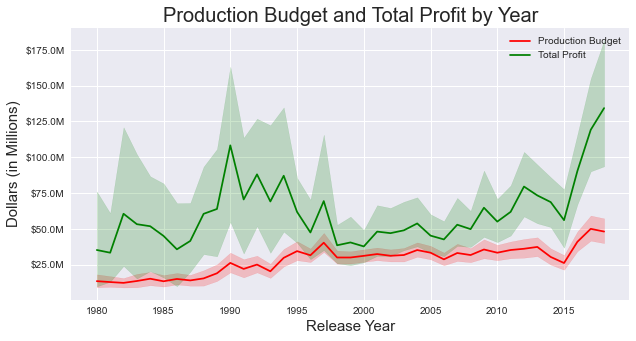

In [44]:
#plotting production budget & total profit over time

fig, ax = plt.subplots(figsize=(10,5))

p = sns.lineplot(x="release_year", y="production_budget", data=recent_movies, label="Production Budget",
                color='red')
p = sns.lineplot(x="release_year", y="total_profit", data=recent_movies, label="Total Profit", color="green")

p.set_xlabel("Release Year", fontsize = 15)
p.set_ylabel("Dollars (in Millions)", fontsize = 15)
p.yaxis.set_major_formatter(display_millions)
p.set_title("Production Budget and Total Profit by Year", fontsize = 20)
plt.figsize=(15,10) 
plt.savefig('images/microsoft_movie_analysis_1')

plt.show();


**Justifying My Sample Size:**

In the above figure, you can see that while the total profit has a very wide range year-to-year, production budgets have largely stayed the same. In fact, average production budgets remained fairly consistent from the late 1990s through 2015.

While production budgets are currently trending up, the data that I have should be accurate for forecasting future performance.

### What about movies that lose money?

While we are looking at successful movies for Microsoft to emulate, **it is also helpful to look at the movies that didn't do well**. My metric for this is movies that lost money. I will use this to contrast the metrics of success that I look at going forward.

In [45]:
#movies that did not make a profit
loss_df= recent_movies_2010.sort_values('total_profit', ascending=True)

loss_df = loss_df[loss_df['ROI']<0]
loss_df.head(5)

,movie,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes,genre_1,genre_2,genre_3
986,Mars Needs Moms,2011,"150,000,000.00","-110,450,242.00",-0.74,5.40,"19,823.00",88.00,Adventure,Animation,Family
1955,Bright,2017,"90,000,000.00","-90,000,000.00",-1.00,6.40,"147,834.00",117.00,Action,Crime,Fantasy
1367,The Promise,2017,"90,000,000.00","-79,448,583.00",-0.88,8.80,53.00,nan,Comedy,None,None
3468,How Do You Know?,2010,"120,000,000.00","-70,371,823.00",-0.59,nan,nan,nan,NaN,NaN,NaN
1208,The Nutcracker in 3D,2010,"90,000,000.00","-69,533,984.00",-0.77,4.30,"3,119.00",110.00,Action,Family,Fantasy


In [46]:
loss_df.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,835.00,835.00,835.00,835.00,665.00,665.00,655.00
mean,"2,013.60","14,270,437.42","-7,513,553.13",-0.77,5.84,"20,956.05",100.80
std,2.26,"24,072,937.04","11,102,661.44",0.30,1.18,"36,607.99",17.10
min,"2,010.00","1,400.00","-110,450,242.00",-1.00,1.90,6.00,45.00
25%,"2,012.00","1,200,000.00","-9,722,362.00",-1.00,5.20,615.00,90.00
50%,"2,014.00","5,000,000.00","-3,459,378.00",-0.94,6.00,"4,829.00",98.00
75%,"2,015.00","18,000,000.00","-1,000,000.00",-0.57,6.70,"29,757.00",109.00
max,"2,018.00","275,000,000.00",-758.00,-0.00,9.00,"403,755.00",177.00


#### Analysis:
- 835 movies from our data set (out of 2124) lost money.
- The **budgets on these movies seem to be smaller** than it is for profitable movies at **8 to 20 million dollars** on the high end (but with at least one going all the way up to 275 million!)
- While I'm sure it's possible to lose more money that you have already spent due to marketing, etc, **based on the data that I have, the most money that a movie can lose is it's production budget**. Perhaps this is why these movies tend to have lower budgets. Maybe the studios know that there is more risk and therefore a greater chance of losing money and therefore don't want to invest as much.

### Answer to Question 1:  Measuring Success
- **Total Profit:** The higher the profits, the better.
- **ROI**: Because we need to see how well the movie performs in relation to how much it cost to make that movie.
- **Profit Loss:** Looking at movies who lost money to see if there are any trends that Microsoft can avoid.

## Question 2: Which Genres have been the most successful?

**What genres correspond to the most profitable movies as well as the movies with the best ROI?**

Note: Since a movie can have multiple genres, I will do value counts for each of the 3 genre columns, and then do value counts to determine how many times each genre is associated with each dataset.

### Box Plot of Profit Genres

In [86]:
recommended_genres = ['Animation','Adventure', 'Sci-Fi','Action','Fantasy' ]
genre_order = recent_data.groupby('genres_list')['total_profit'].mean().sort_values(ascending=False)
genre_order = genre_order.loc[recommended_genres].index

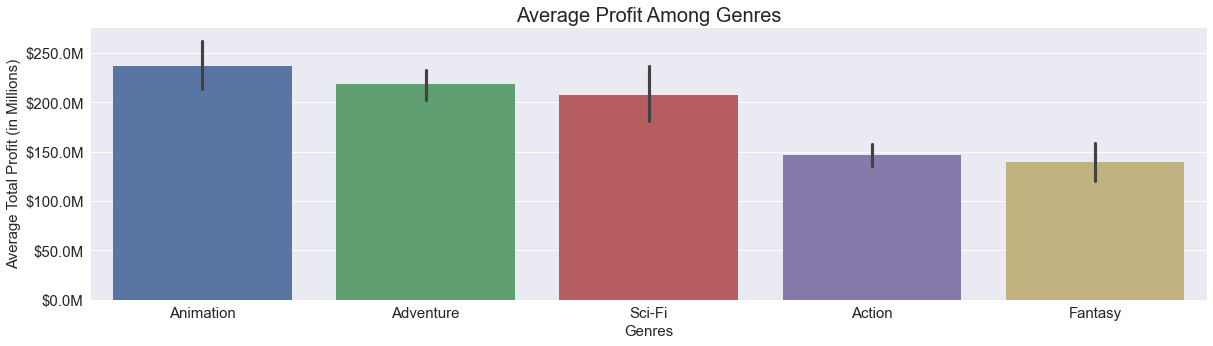

In [141]:
#This plots the genres for 2000 - 2010
#source- Office Hours 10/12 6:30PM

fig, ax = plt.subplots(figsize=(20,5))
p = sns.barplot(data=recent_data, x='genres_list', y='total_profit', order=genre_order, ci=68 );
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


p.set_xlabel("Genres", fontsize = 15)
p.set_ylabel("Average Total Profit (in Millions)", fontsize = 15)
p.yaxis.set_major_formatter(display_millions)
p.set_title("Average Profit Among Genres", fontsize = 20)
plt.figsize=(30,20) 
plt.savefig('images/project_1_bar_4')

plt.show();



### Analysis
- Adventure, Sci-Fi, and Animation all have high average profit, and a low uncertanty window. 
- Action, Fantasy, and Family performed well, but not as good as the top 3.
- Musicals had a decent average Profit, but an incredibly high uncertanity window, making it a genre to avoid unless other data says otherwise.

In [48]:
#creating variables
profit_df= recent_movies_2010.sort_values('total_profit', ascending=False) #all recent movies ranked by profit.
roi_df = recent_movies_2010.sort_values('ROI', ascending=False) #all recent movies ranked by ROI.
top_profit = profit_df[0:500] #Top 500 movies by Total Profit
all_profit = profit_df[0:1250] #all movies that made a profit. (top 1250)
top_roi = roi_df[0:500] # top 500 movies by ROI.

In [49]:
#creating function
def count_genre_df(df): #gets the value counts of the genre columns in a dataframe
    genre_df = df[['genre_1', 'genre_2' , 'genre_3']]
    genre_counts= genre_df.apply(pd.Series.value_counts)
    genre_df = genre_counts.fillna(0)
    genre_df['total'] = genre_counts.sum(axis=1)
    genre_df = genre_df.reset_index()
    return genre_df

Using my count_genre_df function to get the genres associated with profitable movies (top 500 profit), as well as movies that lost money.

In [50]:
#These are the genres from the project_df which did not make a profit.
loss_genre_df = count_genre_df(loss_df)
loss_genre_df = loss_genre_df.reset_index()
loss_genre_df = loss_genre_df.drop(loss_genre_df[['level_0','genre_1', 'genre_2', 'genre_3']], axis=1)
loss_genre_df = loss_genre_df.sort_values('total', ascending=False)

#These are the genres from the 500 most profitable movies from 2010-2019
genre_df_profit = count_genre_df(top_profit)
genre_df_profit = genre_df_profit.sort_values('total', ascending=False)
genre_df_profit = genre_df_profit.drop(genre_df_profit[['genre_1', 'genre_2', 'genre_3']], axis=1)

#Genre DF for ALL movies from dataset 
genre_df_2010 = count_genre_df(recent_movies_2010)
genre_df_2010 = genre_df_2010.drop(genre_df_2010[['genre_1', 'genre_2', 'genre_3']], axis=1)
genre_df_2010 = genre_df_2010.sort_values('total', ascending = False)

#These are the genres from ALL profitable movies from 2010-2019
genre_df_all_profit = count_genre_df(all_profit)
genre_df_all_profit = genre_df_all_profit.drop(genre_df_all_profit[['genre_1', 'genre_2', 'genre_3']], axis=1)
genre_df_all_profit = genre_df_all_profit.sort_values('total', ascending=False)

#These are the genres from the 500 movies with the best ROI from 2010-2019
genre_df_roi = count_genre_df(top_roi)
genre_df_roi = genre_df_roi.sort_values('total', ascending=False)
genre_df_roi = genre_df_roi.drop(genre_df_roi[['genre_1', 'genre_2', 'genre_3']], axis=1)

In [133]:
top_profit_genres = genre_df_profit.iloc[0:10]
top_profit_genres

,index,total
1,Adventure,202.00
0,Action,193.00
4,Comedy,163.00
7,Drama,129.00
18,Thriller,74.00
2,Animation,71.00
16,Sci-Fi,70.00
9,Fantasy,47.00
5,Crime,43.00
15,Romance,40.00


In [137]:
top_roi_genres = genre_df_roi.iloc[0:10]
top_roi_genres

,index,total
7,Drama,203.00
4,Comedy,153.00
0,Action,105.00
1,Adventure,103.00
18,Thriller,81.00
11,Horror,71.00
15,Romance,64.00
14,Mystery,54.00
16,Sci-Fi,48.00
5,Crime,42.00


### Genre Top Profit & ROI

In [51]:
#Genres that are associated with the Top 500 most profitable movies and/or the 500 movies with the best ROI.

genre_df_merged = pd.merge(genre_df_profit, genre_df_roi, on= 'index', how='left')
genre_df_merged = genre_df_merged.rename(columns={'total_x': 'profit_genres', 'total_y': 'roi_genres'})
genre_df_merged

,index,profit_genres,roi_genres
0,Adventure,202.00,103.00
1,Action,193.00,105.00
2,Comedy,163.00,153.00
3,Drama,129.00,203.00
4,Thriller,74.00,81.00
5,Animation,71.00,37.00
6,Sci-Fi,70.00,48.00
7,Fantasy,47.00,30.00
8,Crime,43.00,42.00
9,Romance,40.00,64.00


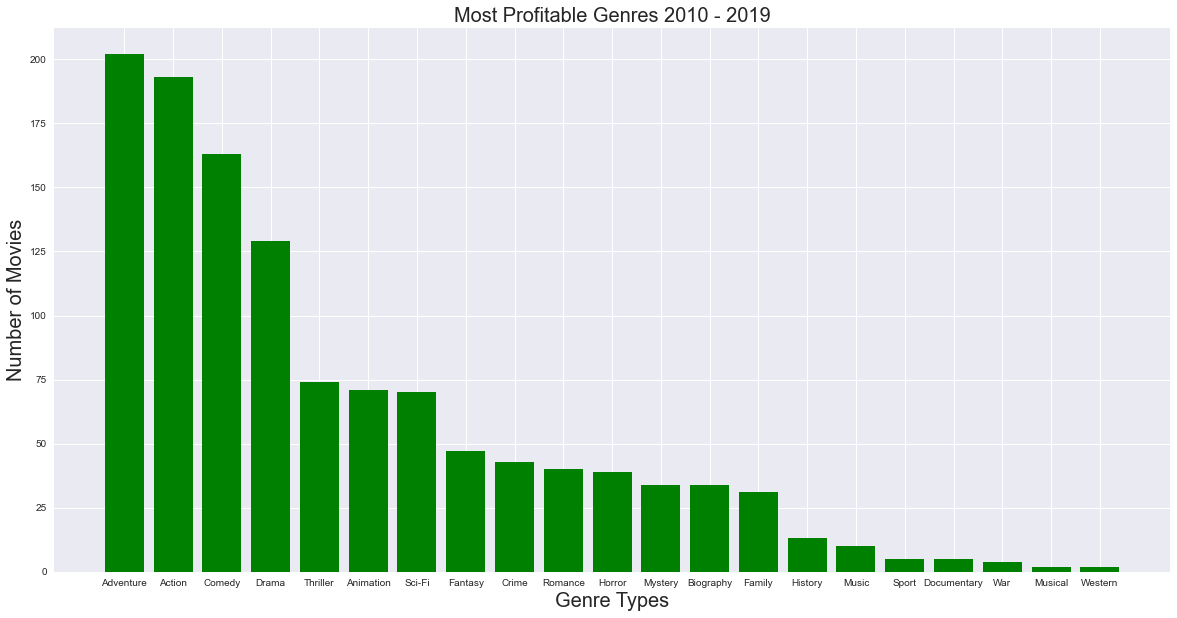

In [52]:
df = genre_df_merged

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['profit_genres'],  color="green")

ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Number of Movies', size=20)
ax.set_title('Most Profitable Genres 2010 - 2019', size=20);


In [53]:
genre_df_2010.iloc[0:8]

,index,total
7,Drama,894.00
4,Comedy,590.00
0,Action,485.00
1,Adventure,374.00
18,Thriller,313.00
5,Crime,274.00
15,Romance,229.00
11,Horror,224.00


### What Movies are being Made?

The Genres that are most common (and presumably most popular) are:
1. Drama
2. Comedy
3. Action
4. Adventure
5. Thriller
6. Crime
7. Romance
8. Horror

However, just because these are the most common genres, that doesn't mean that they are the best performing genres.

### Top Performing Genres by Total Profit and ROI

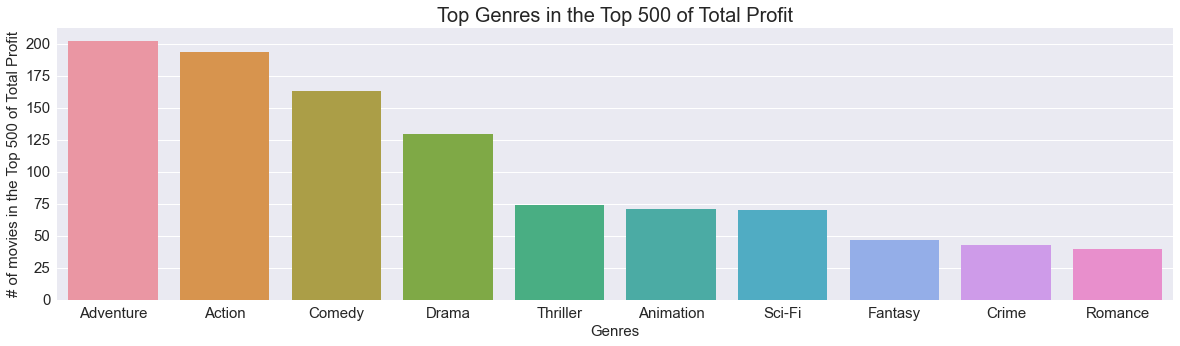

In [136]:
fig, ax = plt.subplots(figsize=(20,5))
p = sns.barplot(data=top_profit_genres, x='index', y='total' );

p.set_xlabel("Genres", fontsize = 15)

p.set_ylabel("# of movies in the Top 500 of Total Profit", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#p.yaxis.set_major_formatter(display_millions)
p.set_title("Top Genres in the Top 500 of Total Profit", fontsize = 20)
plt.figsize=(30,20) 
plt.savefig('images/project_1_bar_3')

plt.show();



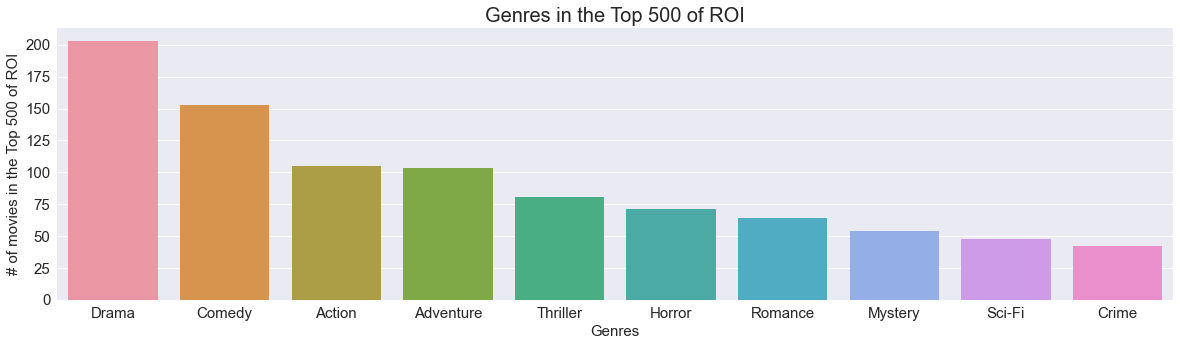

In [139]:
fig, ax = plt.subplots(figsize=(20,5))
p = sns.barplot(data=top_roi_genres, x='index', y='total' );

p.set_xlabel("Genres", fontsize = 15)
p.set_ylabel("# of movies in the Top 500 of ROI", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#p.yaxis.set_major_formatter(display_millions)
p.set_title("Genres in the Top 500 of ROI", fontsize = 20)
plt.figsize=(30,20) 
plt.savefig('images/project_1_bar_2')

plt.show();

Looking at the top 500 movies (the top quartile of our dataset), we see the top performing genres.

**Top by Profit**
1. Adventure
2. Action
3. Comedy
4. Drama
5. Thriller
6. Animation
7. Sci-Fi

**Top by ROI**
1. Drama
2. Comedy
3. Action
4. Adventure
5. Thriller
6. Horror
7. Romance
8. Mystery


This information tells us how many of the top profit and ROI movies are classified as each genre.**However, the data does NOT tell us how many of each type of movie is being made, and how many are unsuccessful. We will need to to dig further to uncover that information.**

However, **this data set does accurately show which genres were successful in the time period that we have data for**. So it's safe to assume that these are the most popular genres being made, answering question 2.


## Genre Success Rate

Let's find out how successful each genre is when you also take into consideration how many movies of that genre did not meet our success metrics.

In [56]:
#function for determining success rate

def success_rate_df(df):
    success_rate = df.apply(lambda x: x['Profit'] / x['Total'], axis=1)
    df['success_rate'] = success_rate
    df['success_rate'] = df['success_rate'].map("{:.2%}".format)
    df = df.sort_values('success_rate', ascending=False)


In [57]:
#function for determining loss rate
def loss_rate_df(df):
    loss_rate = df.apply(lambda x: x['Loss'] / x['Total'], axis=1)
    df['loss_rate'] = loss_rate
    df['loss_rate'] = df['loss_rate'].map("{:.2%}".format)
    df = df.sort_values('loss_rate', ascending=False)

**First, let's identify the movies that aren't losing money.**

In [58]:
#Comparing genres of ALL profitable movies from 2010 df with genres of movies that lost money.

genre_comparison_df_2 = pd.merge(genre_df_all_profit, loss_genre_df, on='index', how='inner')
genre_comparison_df_2 = genre_comparison_df_2.rename(columns={"total_x": "Profit", "total_y": "Loss"})
total_genre_count_2 = genre_comparison_df_2.apply(lambda x: x['Profit'] + x['Loss'], axis=1)
genre_comparison_df_2['Total'] = total_genre_count_2
genre_comparison_df_2['Difference'] = genre_comparison_df_2.apply(lambda x: x['Profit'] - x['Loss'], axis=1)


success_rate_df(genre_comparison_df_2)
loss_rate_df(genre_comparison_df_2)
genre_comparison_df_2 = genre_comparison_df_2.rename(columns={'success_rate': 'break_even_rate'})
genre_comparison_df_2 = genre_comparison_df_2.sort_values('break_even_rate',ascending=False)
genre_comparison_df_2.head(2)

,index,Profit,Loss,Total,Difference,break_even_rate,loss_rate
9,Animation,96.00,16.00,112.00,80.00,85.71%,14.29%
3,Adventure,299.00,73.00,372.00,226.00,80.38%,19.62%


**Not losing money is good. But let's look at the top performing movies, so Microsoft can emulate the most successful examples**
Again we will use the top quartile of our data set as a metric of success to try to emulate.

In [59]:
#Comparing genres of top 500 profitable movies from 2010 df with genres of movies that lost money.

genre_comparison_df = pd.merge(genre_df_profit, loss_genre_df, on='index', how='inner')
genre_comparison_df = genre_comparison_df.rename(columns={"total_x": "Profit", "total_y": "Loss"})
total_genre_count = genre_comparison_df.apply(lambda x: x['Profit'] + x['Loss'], axis=1)
genre_comparison_df['Total'] = total_genre_count
success_rate = genre_comparison_df.apply(lambda x: x['Profit'] / x['Total'], axis=1)
genre_comparison_df['success_rate'] = success_rate
genre_comparison_df['success_rate'] = genre_comparison_df['success_rate'].map("{:.2%}".format)
genre_comparison_df = genre_comparison_df.sort_values('success_rate', ascending=False)
genre_comparison_df['Difference'] = genre_comparison_df.apply(lambda x: x['Profit'] - x['Loss'], axis=1)
genre_comparison_df = genre_comparison_df.rename(columns={'success_rate': 'top_500_rate'})

genre_comparison_df

,index,Profit,Loss,Total,top_500_rate,Difference
5,Animation,71.00,16.00,87.00,81.61%,55.00
0,Adventure,202.00,73.00,275.00,73.45%,129.00
7,Fantasy,47.00,31.00,78.00,60.26%,16.00
6,Sci-Fi,70.00,50.00,120.00,58.33%,20.00
1,Action,193.00,153.00,346.00,55.78%,40.00
13,Family,31.00,25.00,56.00,55.36%,6.00
2,Comedy,163.00,181.00,344.00,47.38%,-18.00
11,Mystery,34.00,44.00,78.00,43.59%,-10.00
4,Thriller,74.00,124.00,198.00,37.37%,-50.00
12,Biography,34.00,58.00,92.00,36.96%,-24.00


In [60]:
genre_comparison_df_dif = genre_comparison_df.sort_values('Difference', ascending=False)
genre_comparison_df_dif

genre_comparison_df_2_dif = genre_comparison_df_2.sort_values('Difference', ascending=False)

### Bar Graph - Profitable Movies Among Genres

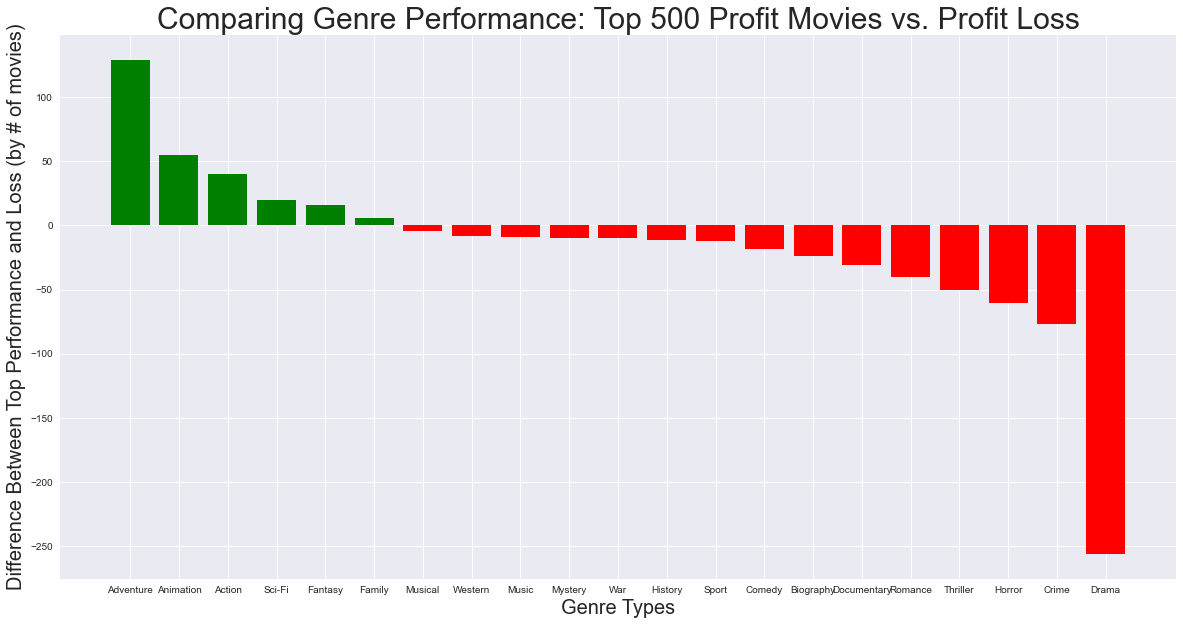

In [61]:
df = genre_comparison_df_dif

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['Difference'],  color=(df['Difference'] >= .50).map({True: 'g',
                                                    False: 'r'}))


ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Difference Between Top Performance and Loss (by # of movies)', size=20)
plt.savefig('images/microsoft_project_figure_2')
ax.set_title('Comparing Genre Performance: Top 500 Profit Movies vs. Profit Loss', size=30);

This graph shows the difference between the number of times a genre appears in the top 500 most profitable movies and the number of times that genre does not generate a profit. Most of the genres are really close to the 0 line, but does show a few genres that perform very good or bad.

This graph takes into consderation how well a certain genre does in relation to how many movies of that genre are made. 

Only **6** genres show up in the Top 500 movies more often than they lose money. 
**Adventure** is far and a way the best performer by this metric. **Animation , Action, and Sci-Fi** are also perferable genres. **Fantasy and Family** have a slight positive skew as well.

**All other genres** are more likely to lose money than they are to be one of the top 500 movies. Most notably, **Drama** has a very negative schew. 

While I am advocating for Microsoft to pursue movies with a **high ceiling (maximum profit)**, it is important to recognize which movies also have a **high floor (lowest chance of losing money)**

In [62]:
genre_success_df = genre_comparison_df
genre_success_df = genre_success_df.drop(genre_success_df[['Profit', 'Loss', 'Total', 'Difference']], axis=1)

genre_success_df_2 = genre_comparison_df_2
genre_success_df_2 = genre_success_df_2.drop(genre_success_df_2[['Profit', 'Loss', 'Total', 'Difference']], axis=1)


genre_success_combined = pd.merge(genre_success_df, genre_success_df_2, on='index', how='inner')
genre_success_combined = genre_success_combined.rename(columns={'success_rate': 'break_even_rate'})

## Genre Performance DataFrame

In [63]:
genre_performance_df = pd.merge(genre_success_combined, genre_df_merged, on= 'index', how='left')
genre_performance_df['total_in_top_500_profit'] = genre_performance_df['profit_genres']
genre_performance_df['total_in_top_500_roi'] = genre_performance_df['roi_genres']
genre_performance_df = genre_performance_df.drop(genre_performance_df[['profit_genres', 'roi_genres']], axis=1)

genre_performance_df.sort_values('break_even_rate', ascending=False)

,index,top_500_rate,break_even_rate,loss_rate,total_in_top_500_profit,total_in_top_500_roi
0,Animation,81.61%,85.71%,14.29%,71.00,37.00
1,Adventure,73.45%,80.38%,19.62%,202.00,103.00
2,Fantasy,60.26%,75.59%,24.41%,47.00,30.00
5,Family,55.36%,74.49%,25.51%,31.00,20.00
6,Comedy,47.38%,68.85%,31.15%,163.00,153.00
4,Action,55.78%,68.32%,31.68%,193.00,105.00
7,Mystery,43.59%,67.65%,32.35%,34.00,54.00
3,Sci-Fi,58.33%,67.11%,32.89%,70.00,48.00
11,Music,34.48%,64.81%,35.19%,10.00,16.00
12,Romance,33.33%,64.13%,35.87%,40.00,64.00


In [64]:
#joining in my average budget and profit data from earlier.
genre_performance_df = pd.merge(genre_performance_df, recent_data_finance_df, 
                                left_on= 'index', right_on= 'genres_list', how='inner'  )
genre_performance_df.rename(columns = {'total_profit': 'avg_profit',
                              'production_budget' : 'avg_budget'}, inplace = True)
genre_performance_df = genre_performance_df.drop(genre_performance_df[['total_in_top_500_profit',
                                                                       'total_in_top_500_roi', 'genres_list']], axis=1)

genre_performance_df

,index,top_500_rate,break_even_rate,loss_rate,avg_profit,avg_budget
0,Animation,81.61%,85.71%,14.29%,"236,515,845.50","87,252,136.75"
1,Adventure,73.45%,80.38%,19.62%,"218,058,263.63","97,385,066.67"
2,Fantasy,60.26%,75.59%,24.41%,"139,501,425.69","80,013,333.33"
3,Sci-Fi,58.33%,67.11%,32.89%,"207,722,074.37","79,325,154.26"
4,Action,55.78%,68.32%,31.68%,"146,490,429.50","73,383,205.65"
5,Family,55.36%,74.49%,25.51%,"113,012,906.67","60,576,904.76"
6,Comedy,47.38%,68.85%,31.15%,"79,996,595.02","35,314,430.52"
7,Mystery,43.59%,67.65%,32.35%,"55,148,147.49","22,033,766.82"
8,Thriller,37.37%,59.48%,40.52%,"67,043,336.61","27,454,280.59"
9,Biography,36.96%,61.07%,38.93%,"47,896,710.67","24,174,645.16"


## Question 3: How Much Should Microsoft Budget For Their Movies?
- This question will be answered more specifically in my recommendations, but let's explore this in a general sense for now.

### Bar Graph - Average Budget Among Genres

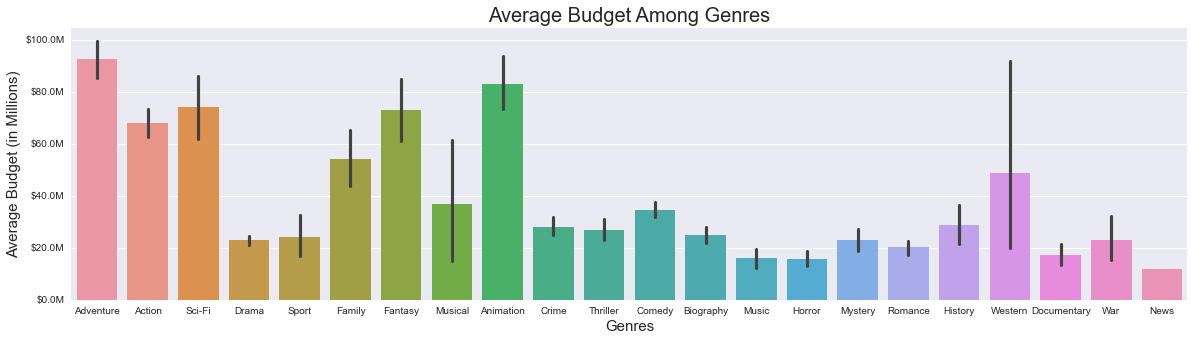

In [143]:
fig, ax = plt.subplots(figsize=(20,5))
p = sns.barplot(data=genre_data, x='genres_list', y='production_budget' );

p.set_xlabel("Genres", fontsize = 15)
p.set_ylabel("Average Budget (in Millions)", fontsize = 15)
p.yaxis.set_major_formatter(display_millions)
p.set_title("Average Budget Among Genres", fontsize = 20)
plt.figsize=(30,20) 
plt.savefig('images/project_1_bar_1')

plt.show();


**Analysis:** The genres that have had high performance metrics up to this point all seem to have the highest average budgets, but also a relatively low uncertainty range.

# Recommendations

## Microsoft Should Focus on Animation and Adventure

In [66]:
genre_performance_df.iloc[0:2]

,index,top_500_rate,break_even_rate,loss_rate,avg_profit,avg_budget
0,Animation,81.61%,85.71%,14.29%,"236,515,845.50","87,252,136.75"
1,Adventure,73.45%,80.38%,19.62%,"218,058,263.63","97,385,066.67"


**Animated Films** have highest break-even rate and top 500 rate of any other genre.

- This means that not only did 85% of these films recoup their production costs, but 81% of them ended up in the top quartile of profit performance.
- Animation is as safe of a bet as you can get.

**Adventure films** are a close second to Animation. 
- Ranked Second in both break-even rate and Top 500 rate.
- However, they have a higher average budget and lower average profit than Animation.

In [67]:
animated_movies = recent_data.loc[(recent_data['genres_list'] == 'Animation')]
adventure_movies = recent_data.loc[(recent_data['genres_list'] == 'Adventure')]
recommendation_1 = animated_movies.append(adventure_movies)

In [78]:
low_budget_genres = ['Sci-Fi', 'Action', 'Fantasy']
recommendation_1b = recent_data.loc[(recent_data['genres_list'].isin(low_budget_genres))]



### Scatterplot - Distribution of Animated and Adventure

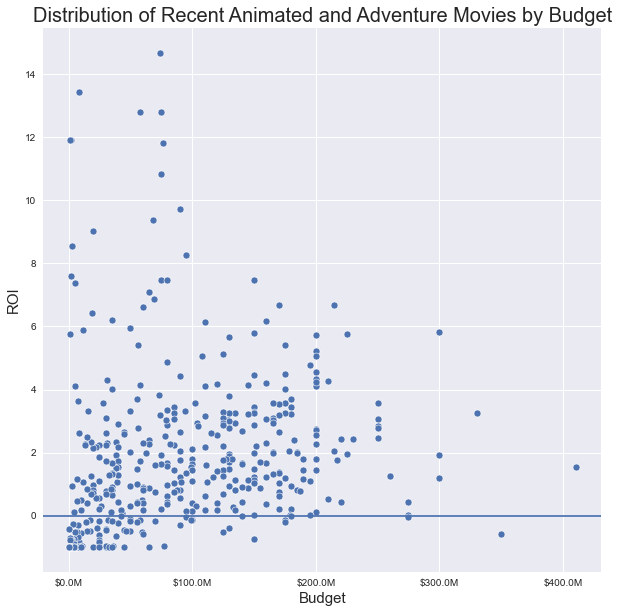

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
p = sns.scatterplot(x="production_budget", y="ROI", data=recommendation_1);

p.set_xlabel("Budget", fontsize = 15)
p.set_ylabel("ROI", fontsize = 15)
p.xaxis.set_major_formatter(display_millions)
p.set_title("Distribution of Recent Animated and Adventure Movies by Budget", fontsize = 20)
plt.figsize=(30,20) 
plt.axhline(y=0)
plt.savefig('images/project_1_scatter_1')

plt.show();

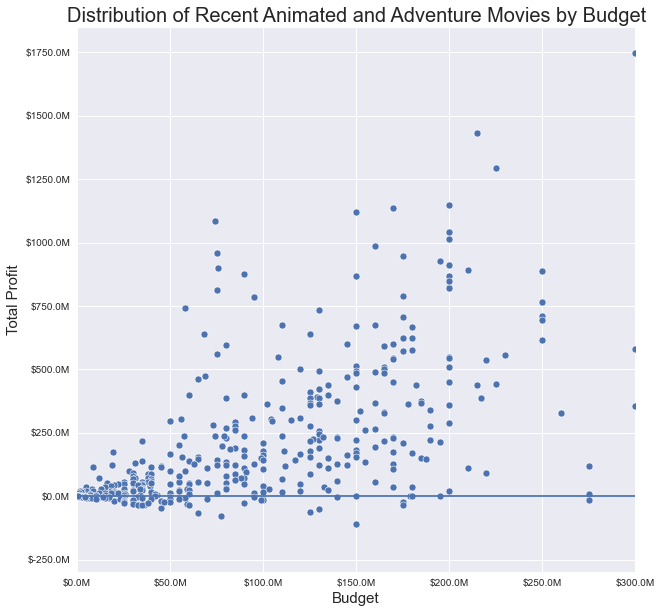

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
p = sns.scatterplot(x="production_budget", y="total_profit", data=recommendation_1);

p.set_xlabel("Budget", fontsize = 15)
p.set_ylabel("Total Profit", fontsize = 15)
p.xaxis.set_major_formatter(display_millions)
p.yaxis.set_major_formatter(display_millions)

#plt.ylim(-20000000, 125000000)
plt.xlim(0, 300000000)

p.set_title("Distribution of Recent Animated and Adventure Movies by Budget", fontsize = 20)
plt.figsize=(30,20) 
plt.axhline(y=0)
plt.savefig('images/project_1_scatter_1')

plt.show();

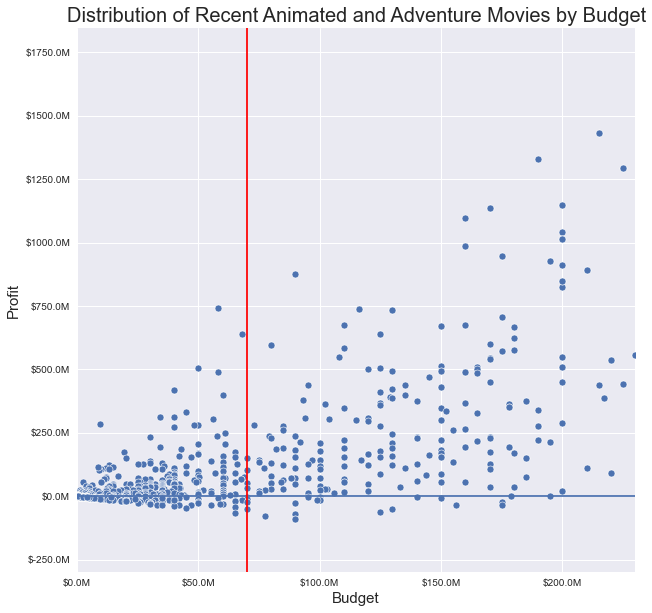

In [120]:
fig, ax = plt.subplots(figsize=(10,10))
p = sns.scatterplot(x="production_budget", y="total_profit", data=recommendation_1b);

p.set_xlabel("Budget", fontsize = 15)
p.set_ylabel("Profit", fontsize = 15)
p.xaxis.set_major_formatter(display_millions)
p.yaxis.set_major_formatter(display_millions)

#plt.ylim(0, 125000000)
plt.xlim(0, 230000000)


p.set_title("Distribution of Recent Animated and Adventure Movies by Budget", fontsize = 20)
plt.figsize=(15,10) 
plt.axhline(y=0)
plt.axvline(x=70000000, color='red')
plt.savefig('images/project_1_scatter_1')

plt.show();

**Analysis**
- There is a high amount of uncertainty, with the highest chance to lose money at the lower budget range (0  to aproximately 70 Million).
- There is a slight positive correlation between production budget and ROI, up to about the $200M mark. 

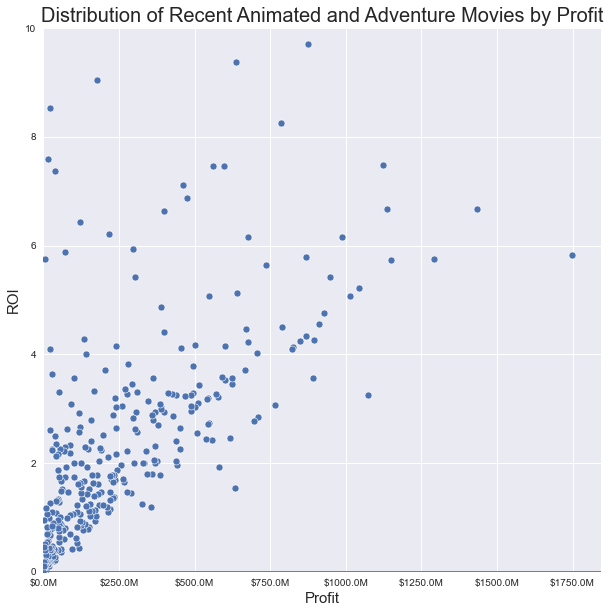

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
p = sns.scatterplot(x="total_profit", y="ROI", data=recommendation_1);

p.set_xlabel("Profit", fontsize = 15)
p.set_ylabel("ROI", fontsize = 15)
p.xaxis.set_major_formatter(display_millions)
plt.ylim(0,10)
plt.xlim(0,None)
p.set_title("Distribution of Recent Animated and Adventure Movies by Profit", fontsize = 20)
plt.figsize=(30,20) 
plt.axhline(y=0)
plt.savefig('images/project_1_scatter_2')

plt.show();

In [70]:
recent_data_budgets.iloc[0:2]

,count,mean,std,min,25%,50%,75%,max
genres_list,,,,,,,,
Adventure,390.00,"97,385,066.67","74,709,942.66","180,000.00","33,000,000.00","86,500,000.00","150,000,000.00","410,600,000.00"
Animation,117.00,"87,252,136.75","57,365,120.06","500,000.00","40,000,000.00","76,000,000.00","130,000,000.00","260,000,000.00"


**Budget**

**I recommend a budget of 80 Million - 150 Million for these two genres.**
- 80 Million is high enough to avoid much of the risk that comes from attempting these genres with a low budget.
- 150 Million was where the top quartile of production budget begins. Microsoft is welcome to spend more than I have recommened, but if they stay in the range they have a low chance of losing money, and a high chance of getting a ROI of 2-6.
- Microsoft has a lot of resources at it's disposal and can afford the necessary budgets to make these movies.

## Other Genres to Consider

In [71]:
genre_performance_df.iloc[2:8]

,index,top_500_rate,break_even_rate,loss_rate,avg_profit,avg_budget
2,Fantasy,60.26%,75.59%,24.41%,"139,501,425.69","80,013,333.33"
3,Sci-Fi,58.33%,67.11%,32.89%,"207,722,074.37","79,325,154.26"
4,Action,55.78%,68.32%,31.68%,"146,490,429.50","73,383,205.65"
5,Family,55.36%,74.49%,25.51%,"113,012,906.67","60,576,904.76"
6,Comedy,47.38%,68.85%,31.15%,"79,996,595.02","35,314,430.52"
7,Mystery,43.59%,67.65%,32.35%,"55,148,147.49","22,033,766.82"


**Fantasy, Sci-Fi, Action, Family, Comedy, and Mystery** all have high break-even rates (67% or better), and a decent chance of making it into the Top 500. While these genres are not as safe of a bet as Animation or Adventure, they should reliabily hit the  metrics that we care about.


### Budget

In [72]:
recent_data_budgets.iloc[2:6]

,count,mean,std,min,25%,50%,75%,max
genres_list,,,,,,,,
Fantasy,135.00,"80,013,333.33","78,573,544.36","100,000.00","17,350,000.00","50,000,000.00","140,000,000.00","410,600,000.00"
Sci-Fi,158.00,"79,325,154.26","83,894,366.84","7,000.00","5,000,000.00","40,000,000.00","153,750,000.00","350,000,000.00"
Action,496.00,"73,383,205.65","70,078,643.26","75,000.00","20,000,000.00","50,000,000.00","116,250,000.00","410,600,000.00"
Family,105.00,"60,576,904.76","62,935,514.70","125,000.00","9,000,000.00","35,000,000.00","95,000,000.00","250,000,000.00"


**Fantasy, Sci-Fi, and Action** all have slightly lower budget ranges than Animation and Adventure.
- I recommend spending between 50 Million dollars and 150 Million dollars for these three genres.

**Comedy and Mystery** have the lowest budget ranges out of the top genres that I am recommending.
- The ideal range  for Comedy is 20 Million to 45 Million.
- The ideal range for Mystery is 10 Million to 30 Million.
- These budgets give them a high chance of breaking even, with the potential to be very profitable.

## Microsoft Should Take Calculated Risks with Low Budget Movies

Low budget movies cost just a fraction of high budget movies with average production budgets of 1 to 5 million dollars. Therefore it is okay to take more risks with these films becuase there is less money to lose. However, Microsoft should still be smart and deliberate about which genres they pursue.

In [73]:
genre_performance_df.loc[(genre_performance_df['index'] == 'Horror')]

,index,top_500_rate,break_even_rate,loss_rate,avg_profit,avg_budget
13,Horror,28.26%,54.38%,45.62%,"37,784,432.97","14,462,622.08"


In [74]:
genre_performance_df.loc[(genre_performance_df['index'] == 'Thriller')]

,index,top_500_rate,break_even_rate,loss_rate,avg_profit,avg_budget
8,Thriller,37.37%,59.48%,40.52%,"67,043,336.61","27,454,280.59"


In [75]:
genre_performance_df.loc[(genre_performance_df['index'] == 'Romance')]

,index,top_500_rate,break_even_rate,loss_rate,avg_profit,avg_budget
12,Romance,33.33%,64.13%,35.87%,"37,875,667.49","19,723,176.72"


**Low Budget Genres:**
- **Horror, Thriller, and Romance** films all have a better than 50% chance of breaking even, rank high in ROI potentional, and about a third of them could end up being one of the Top 500 profitable movies. 


### Budget
- For **Thriller and Romance**, the ideal range is 15 Million to 30 Million
- **Horror** is truly a low budget option with an ideal budget range of 5 Million to 17 Million.

### Other Genres:
- There is potentional for success for other genress, but I would recommend focusing on the ones that I have specifically recommened they have the **best** chance of financial success.

# Summary

I was tasked with researching movies to see what types of movies are currently being made and using that information to make recommendations to Microsoft as to what types of movies to make with their new production studio.

I used financial data from The Numbers and Genre data from IMDB for this research. By linking them together, I was able to see which Genres had performed well at the box office as well as the production budget, total profit, and ROI. I used this data to caluculate Success Rates for breaking even and/or performing in the top quartile. 

The metrics that I recommend that Microsoft seek to emulate are movies where there was a very high break even success rate and high chance of performing in the top quartile. Using these metrics, I determined that Microsoft should focus on high budget movies primarily in the genres of Animation and Adventure. I also determined that they could diversify by making  Low Budget movies to suppliment their primary focus on high budget movies. For low budget, I recommended that they explore other genres with a high chance of breaking even and good potentional for perfoming in the top quartile. Specifically, Comedy, Mystery, Horror, Thriller, and Romance. 